# Deep Neural Nework Problems

## Setup

In [126]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("CIFAR-100-DNN-Optimization"):
    raise ValueError("Please change working directory to 'path/CIFAR-100-DNN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/CIFAR-100-DNN-Optimization


In [159]:
!pip install -r requirements.txt

In [172]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [278]:
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

## Load Data

In [135]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_pre_path = './data/CIFAR-100/'

In [136]:
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
data_train = data_train_dict[b'data']
y_train_valid = np.array(data_train_dict[b'fine_labels'])
data_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'fine_labels'])

In [ ]:
data_train.shape

(50000, 3072)

In [ ]:
X_train_valid = data_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255
X_test = data_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255

In [206]:
input_shape = X_train_valid[0].shape
input_shape

(32, 32, 3)

In [ ]:
label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
    'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=5000/50000, stratify=y_train_valid, random_state=42)

In [ ]:
len(X_train)

45000

In [ ]:
len(y_train)

45000

In [ ]:
len(np.unique(y_train))

100

In [ ]:
pd.Series(y_train).value_counts()

93    450
16    450
36    450
72    450
55    450
     ... 
62    450
89    450
9     450
68    450
13    450
Name: count, Length: 100, dtype: int64

## Data Analysis

In [ ]:
len(X_train)

45000

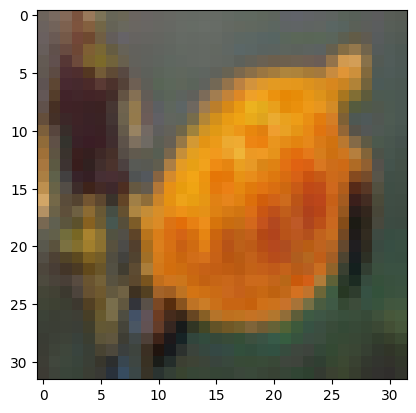

In [ ]:
plt.imshow(X_train[0])
plt.show()

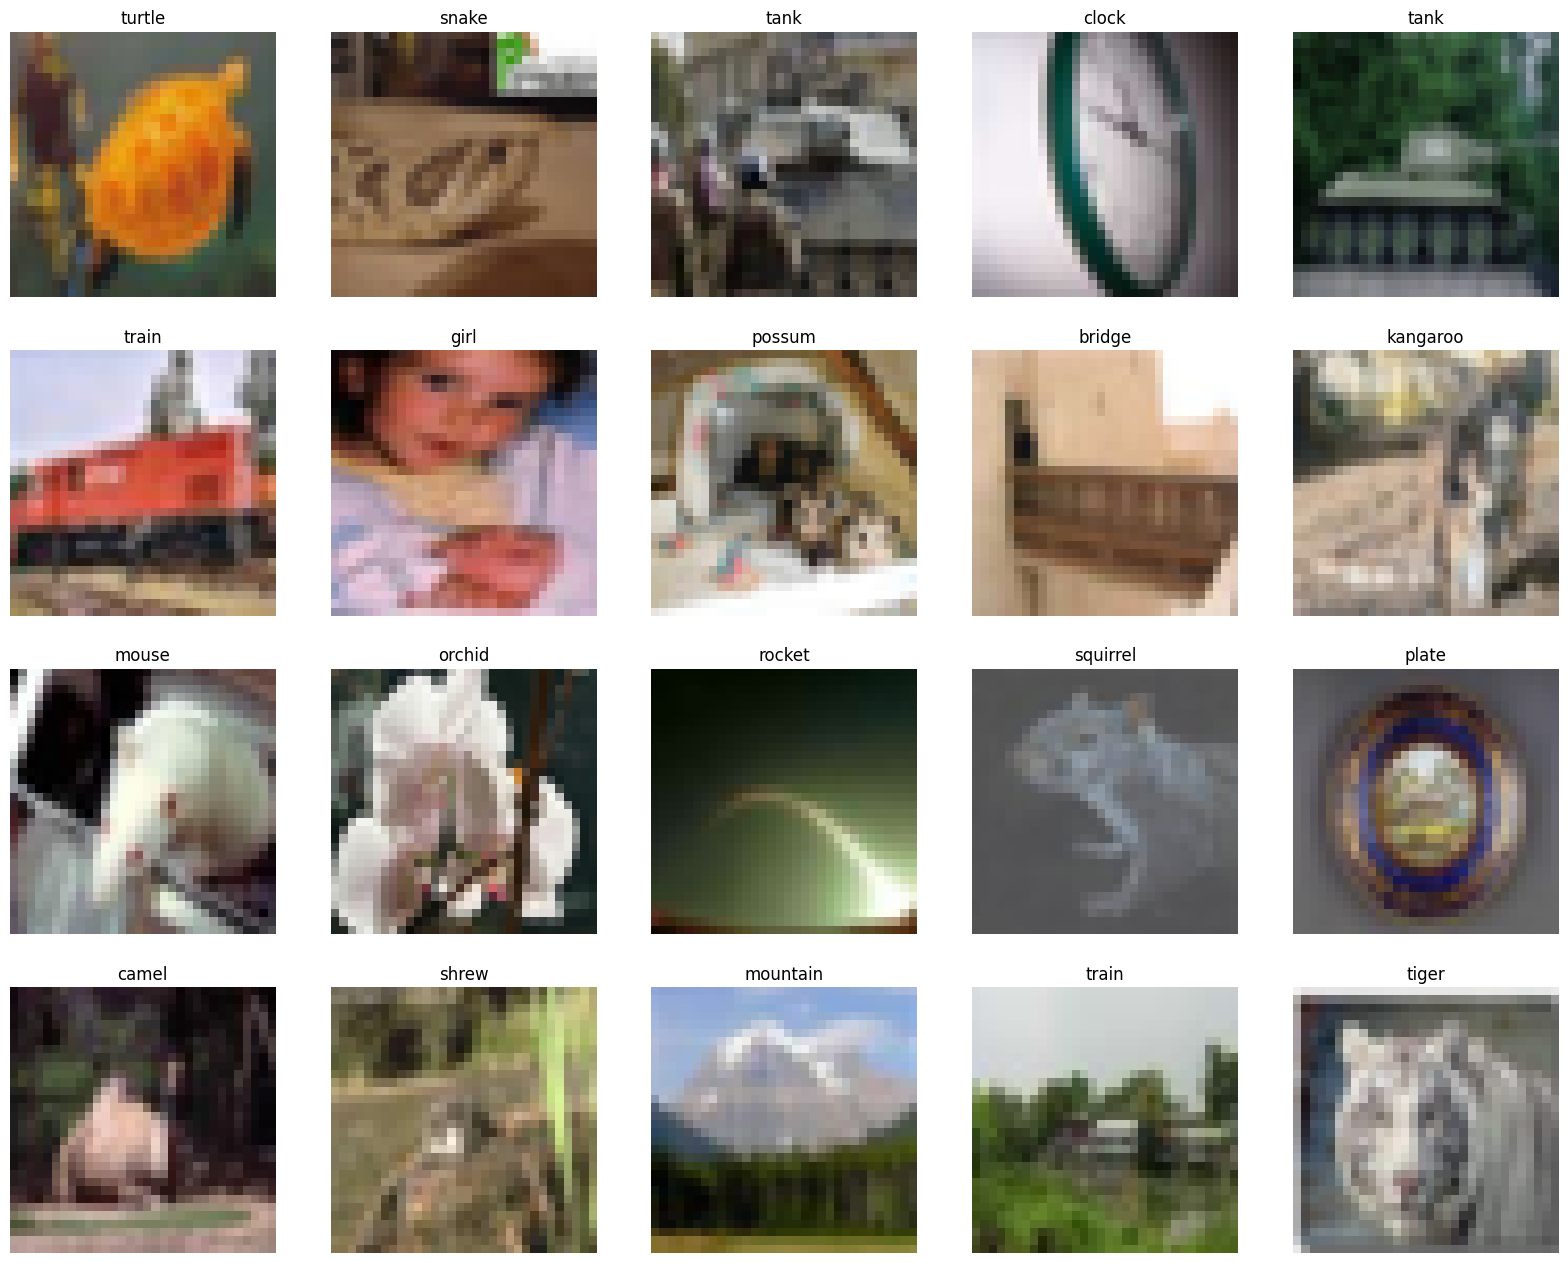

In [ ]:
def plot_images(images, labels, label_names, num_images):
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(label_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_images(X_train, y_train, label_names, num_images=20)

## Training a wide shallow model

In [207]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(500, activation="relu"),
    Dense(500, activation="relu"),
    Dense(100, activation="softmax"),
])


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [197]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [198]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.0513 - loss: 4.2767 - val_accuracy: 0.1144 - val_loss: 3.7939
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.1257 - loss: 3.7368 - val_accuracy: 0.1352 - val_loss: 3.6847
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1546 - loss: 3.5730 - val_accuracy: 0.1533 - val_loss: 3.6081
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1726 - loss: 3.4611 - val_accuracy: 0.1661 - val_loss: 3.5730
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1874 - loss: 3.3823 - val_accuracy: 0.1675 - val_loss: 3.5617
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.1975 - loss: 3.3219 - val_accuracy: 0.1698 - val_loss: 3.5700
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2035 - loss: 3.2734 - val_accuracy: 0.1697 - val_loss: 3.5833
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2080 -

In [204]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1755 - loss: 3.7623


[3.761399269104004, 0.17820000648498535]

Wide shallow model only achieved 18% accuracy

## Solving Vanishing and Exploding Gradient

### Issue recreation

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())
for _ in range(10):
    model.add(Dense(100, activation="sigmoid"))
model.add(Dense(100, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, callbacks=[early_stopping])

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0087 - loss: 4.6278 - val_accuracy: 0.0100 - val_loss: 4.6099
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0098 - loss: 4.6104 - val_accuracy: 0.0100 - val_loss: 4.6064
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0097 - loss: 4.6074 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0099 - loss: 4.6065 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0096 - loss: 4.6061 - val_accuracy: 0.0100 - val_loss: 4.6052


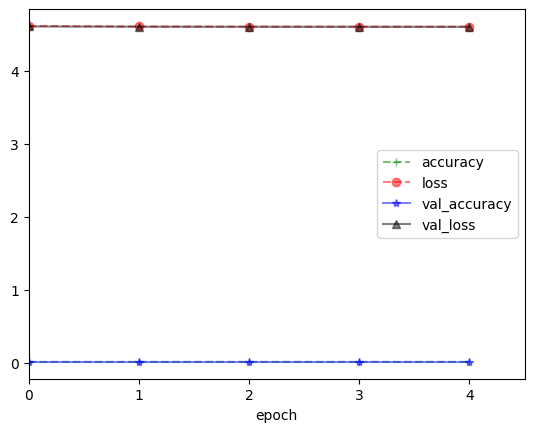

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot(style=["g+--", "ro--", "b*-", "k^-"], alpha=0.5, xlim=[0,4.5], xlabel="epoch", xticks=range(5))
plt.show()

Example of vanishing gradients

### Better Activation and Initialization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())
for _ in range(10):
    model.add(Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(100, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, callbacks=[early_stopping])

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0203 - loss: 4.5076 - val_accuracy: 0.0558 - val_loss: 4.1358
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0652 - loss: 4.0658 - val_accuracy: 0.0886 - val_loss: 3.9479
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0854 - loss: 3.9257 - val_accuracy: 0.0984 - val_loss: 3.8516
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1054 - loss: 3.8225 - val_accuracy: 0.1126 - val_loss: 3.8117
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1195 - loss: 3.7385 - val_accuracy: 0.1246 - val_loss: 3.7275
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1319 - loss: 3.6667 - val_accuracy: 0.1284 - val_loss: 3.7023
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1422 - loss: 3.5957 - val_accuracy: 0.1356 - val_loss: 3.6898
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1497 - loss: 3.5548 - val_accuracy: 0.

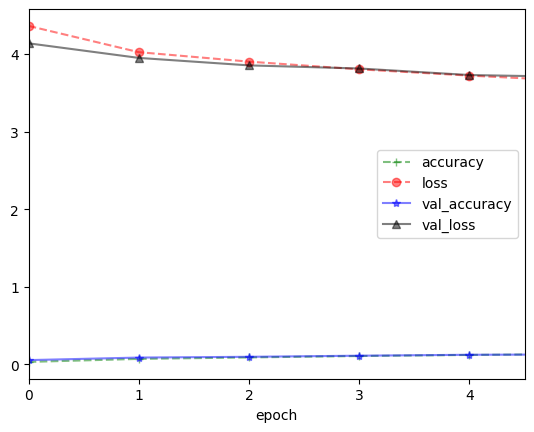

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot(style=["g+--", "ro--", "b*-", "k^-"], alpha=0.5, xlim=[0,4.5], xlabel="epoch", xticks=range(5))
plt.show()